### Imports

In [1]:
# Useful imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

# Libraries for data preprocessing.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library used to split the data.
from sklearn.model_selection import train_test_split

In [2]:
# Global variables
cutsAmount = 50

### Miscellaneous functions

In [3]:
# Function used to plot the data after and before quantile feature engineering.
def quantilePlots(oldFeature, newFeature):
    # For plots titles
    _oldName = "Before IQR feature engineering"
    _newName =  "After IQR feature engineering"
    
    # Make the axes for the plot.
    fig, (axOld, axNew) = plt.subplots(1, 2, sharey=True, figsize=(13, 4))
    axOld.set_title(_oldName, fontsize=14)
    axNew.set_title(_newName, fontsize=14)

    # Plot the feature before the quantile feature engineering.
    sns.histplot(oldFeature, kde=True, element='step', ax=axOld, figure=fig)
    # Plot the feature after the quantile feature engineering.
    sns.histplot(newFeature, kde=True, element='step', ax=axNew, figure=fig)

    # Show the plots.
    plt.show()

### Read the data for the first time

In [4]:
citrusDataset = pd.read_csv("./citrus.csv")
citrusDataset.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


Orange       : 0.500000
Grapefruit   : 0.500000


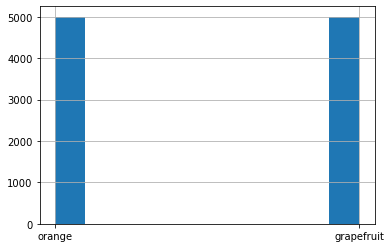

In [5]:
# Count how many values are in each category.
Y = citrusDataset['name'].value_counts()
print('Orange       : {0:f}'.format(Y[0] / len(citrusDataset)))
print('Grapefruit   : {0:f}'.format(Y[1] / len(citrusDataset)))

# Histogram according to name, to visualize the data.
citrusDataset['name'].hist()
plt.show()

### Create the labels.
We are going to create a vector filled with 0's and 1's based in the quality.

In [6]:
# Put in the vector a 1 if the name is 'grapefruit', put a 0 if the name is 'orange'.
Y = [int(citrusDataset['name'][i] == 'grapefruit') for i in range(len(citrusDataset))]
citrusDataset['classification'] = Y
citrusDataset.drop('name', axis=1, inplace=True)

# Print the dataset to see new 'classification' feature.
citrusDataset.head()

,diameter,weight,red,green,blue,classification
0,2.96,86.76,172,85,2,0
1,3.91,88.05,166,78,3,0
2,4.42,95.17,156,81,2,0
3,4.47,95.60,163,81,4,0
4,4.48,95.76,161,72,9,0


# Feature Enginneering

## First experiment: normalize data
For the first experiment we are just going to normalize the data as feature engineering.

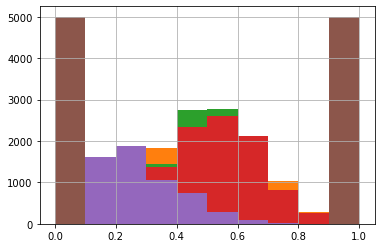

In [7]:
# Store the current labels to asign them later.
citrusDatasetLabels = citrusDataset['classification']

# Normalize the data using min max scaler.
citrusDatasetValues = citrusDataset.values
citrusDatasetNormalized = preprocessing.MinMaxScaler().fit_transform(citrusDataset)

# Create a new pandas data frame and reasing the 'classification' column, to prevent this for be normalized.
citrusDatasetNormalized = pd.DataFrame(citrusDatasetNormalized, columns=citrusDataset.columns)
citrusDatasetNormalized['classification'] = citrusDatasetLabels

# View the normalized data.
for feature in citrusDataset.columns:
    citrusDatasetNormalized[feature].hist()

## Second experiment: standardize data
For the first experiment we are just going to standardize the data as feature engineering.

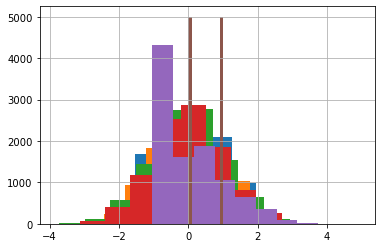

In [8]:
# Store the current labels to asign them later.
citrusDatasetLabels = citrusDataset['classification']

# Normalize the data using min max scaler.
citrusValues = citrusDataset.values
citrusDatasetStandardized = preprocessing.StandardScaler().fit_transform(citrusDatasetValues)
# Create a new pandas dtta frame and reasing the 'classification' column, to prevent this for be normalized.
citrusDatasetStandardized = pd.DataFrame(citrusDatasetStandardized, columns=citrusDataset.columns)
citrusDatasetStandardized['classification'] = citrusDatasetLabels

# View the standardized data.
for feature in citrusDatasetStandardized.columns:
    citrusDatasetStandardized[feature].hist()

## Third experiment: better feature engineering
We are goin to use IQR for removing outliers in the datasets and check for missing values and duplicated

### Check missing values
All features are OK!

In [9]:
citrusDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diameter        10000 non-null  float64
 1   weight          10000 non-null  float64
 2   red             10000 non-null  int64  
 3   green           10000 non-null  int64  
 4   blue            10000 non-null  int64  
 5   classification  10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


### Check for duplicated values
All features are OK!

In [10]:
citrusDataset.duplicated().sum() == 0

True

In [11]:
# Get a copy to work and let the original data frame intact.
dataSetBetterFE = citrusDataset.copy()

### Delete outliers with IQR technique

In [12]:
# Describe the quantils for each features.
print(dataSetBetterFE.columns)
dataSetBetterFE.head()

Index(['diameter', 'weight', 'red', 'green', 'blue', 'classification'], dtype='object')


,diameter,weight,red,green,blue,classification
0,2.96,86.76,172,85,2,0
1,3.91,88.05,166,78,3,0
2,4.42,95.17,156,81,2,0
3,4.47,95.60,163,81,4,0
4,4.48,95.76,161,72,9,0


In [13]:
dataSetBetterFE.describe()

,diameter,weight,red,green,blue,classification
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200,0.500000
std,1.947844,29.212119,10.432954,11.708433,9.061275,0.500025
min,2.960000,86.760000,115.000000,31.000000,2.000000,0.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000,0.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000,0.500000
75%,11.480000,197.722500,161.000000,84.000000,17.000000,1.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000,1.000000


In [14]:
# Function used to calculate the IQR.
def calculateBoundsWithIQR(datacolumn):
    Q1 = datacolumn.quantile(0.25)
    Q3 = datacolumn.quantile(0.75)

    IQR = Q3 - Q1

    lowerRange = Q1 - (1.5 * IQR)
    higherRange = Q3 + (1.5 * IQR)

    return lowerRange, higherRange

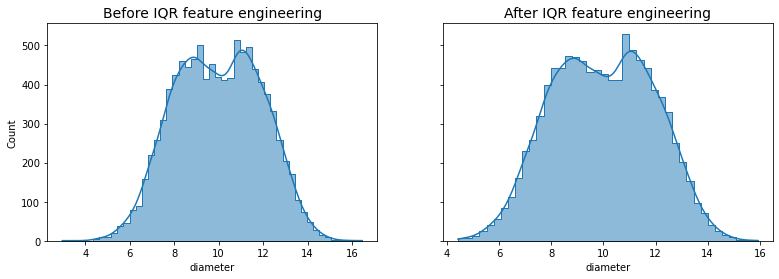

In [15]:
featureBeforeChange = dataSetBetterFE['diameter']

# Make the IQR feature engineering.
lower, higher = calculateBoundsWithIQR(dataSetBetterFE['diameter'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['diameter'] > lower) & (dataSetBetterFE['diameter'] < higher)]

quantilePlots(featureBeforeChange, dataSetBetterFE['diameter'])

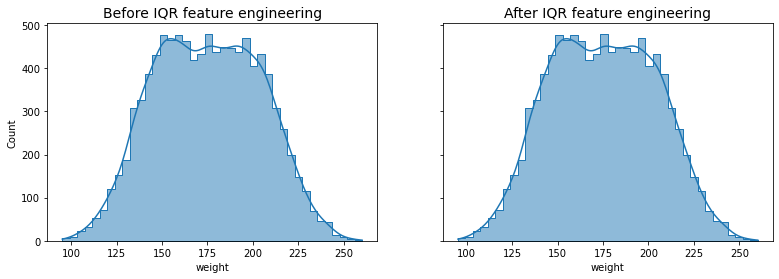

In [16]:
featureBeforeChange = dataSetBetterFE['weight']

# Make the IQR feature engineering.
lower, higher = calculateBoundsWithIQR(dataSetBetterFE['weight'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['weight'] > lower) & (dataSetBetterFE['weight'] < higher)]

quantilePlots(featureBeforeChange, dataSetBetterFE['weight'])

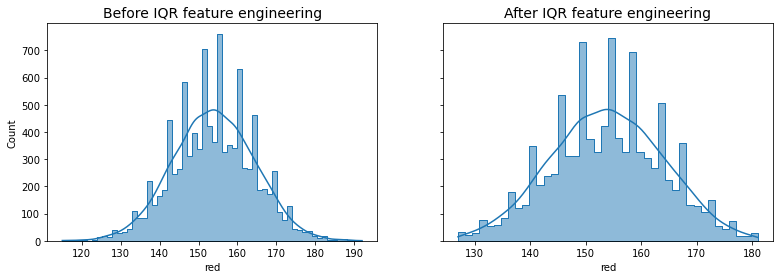

In [17]:
featureBeforeChange = dataSetBetterFE['red']

# Make the IQR feature engineering.
lower, higher = calculateBoundsWithIQR(dataSetBetterFE['red'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['red'] > lower) & (dataSetBetterFE['red'] < higher)]

quantilePlots(featureBeforeChange, dataSetBetterFE['red'])

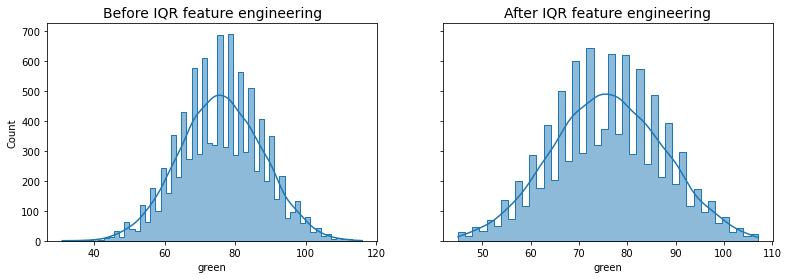

In [18]:
featureBeforeChange = dataSetBetterFE['green']

# Make the IQR feature engineering.
lower, higher = calculateBoundsWithIQR(dataSetBetterFE['green'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['green'] > lower) & (dataSetBetterFE['green'] < higher)]

quantilePlots(featureBeforeChange, dataSetBetterFE['green'])

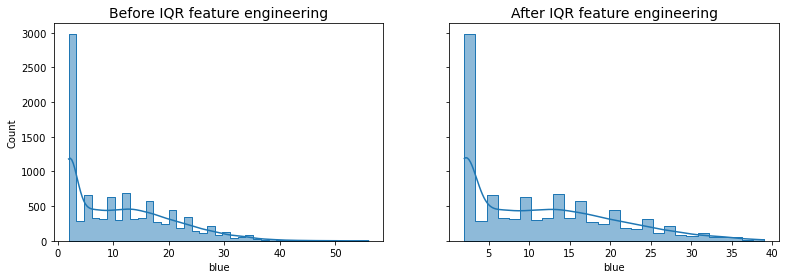

In [19]:
featureBeforeChange = dataSetBetterFE['blue']

# Make the IQR feature engineering.
lower, higher = calculateBoundsWithIQR(dataSetBetterFE['blue'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['blue'] > lower) & (dataSetBetterFE['blue'] < higher)]

quantilePlots(featureBeforeChange, dataSetBetterFE['blue'])

In [20]:
# Print the new amount of data.
dataSetBetterFE.shape

(9823, 6)

### Detecting multicollinearity

Using variable inflation factors to determine multicollinearity and then eliminate these correlated features in this case the features 'diameter'.

In [21]:
# Get the columns needed to calculate the vif
variables = dataSetBetterFE[[
       'diameter', 'weight', 'red', 'green', 'blue']]
constants = add_constant(variables)

# Calculate the vif and store the values in a pandas data frame to display it.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(constants.values, i) for i in range (constants.shape[1])]
vif['features'] = constants.columns
vif

,VIF,features
0,1035.595465,const
1,1064.092753,diameter
2,1055.600295,weight
3,1.061524,red
4,1.231801,green
5,1.188618,blue


In [22]:
# Drop the 'diameter' feature, because because as we see in the previous cell,
#   these were the features with a VIF higher than 5.
citrusDataset.drop('diameter', axis=1, inplace=True)

# Get the columns needed to calculate the vif
variables = dataSetBetterFE[[
    'weight', 'red', 'green', 'blue']]
constants = add_constant(variables)

# Calculate the vif and store the values in a pandas data frame to display it.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(constants.values, i) for i in range (constants.shape[1])]
vif['features'] = constants.columns
vif

,VIF,features
0,397.087147,const
1,1.322891,weight
2,1.054094,red
3,1.204274,green
4,1.168096,blue


### Standardize the data

In [23]:
dataSetBetterFELabels = dataSetBetterFE['classification'].values

# Standardize the data using standar scaler.
dataSetBetterFEValues = dataSetBetterFE.values
dataSetBetterFEStandardized = preprocessing.StandardScaler().fit_transform(dataSetBetterFEValues)

# Create a new pandas data frame and reasing the 'classification' column, to prevent this for be standardized.
dataSetBetterFE = pd.DataFrame(dataSetBetterFEStandardized, columns=dataSetBetterFE.columns)
dataSetBetterFE['classification'] = dataSetBetterFELabels

# Split and store the data

In [24]:
# Function to print the proportion of the training and test values, to be sure that the both splits
#   have the same proportion of low and high quality wines.
def detailProportion(yTrain, yTest):

    # Make the separator of the table.
    hLine = "-" * 26
    hSeparator = "+-{0}-+-{0}-+".format(hLine)

    # Get the info for the training split.
    classification_X_train = yTrain.values
    trainingHeader   = "Training set distribution"
    trainOrange      = "           Orange: {:2.2f}%".format(np.count_nonzero(classification_X_train == 0) / len(yTrain) * 100)
    trainGrapefruit  = "       Grapefruit: {:2.2f}%".format(np.count_nonzero(classification_X_train == 1) / len(yTrain) * 100)
    trainSetRate     = "Training set rate: {:2.2f}%".format(len(yTrain) / (len(yTrain) + len(yTest)) * 100)
    trainSetSize     = "Training set size: {:6d}".format(len(yTrain))

    # Get the info for the test split.
    classification_X_test = yTest.values
    testHeader      = "Test set distribution"
    testOrange      = "        Orange: {:2.2f}%".format(np.count_nonzero(classification_X_test == 0) / len(yTest) * 100)
    testGrapefruit  = "    Grapefruit: {:2.2f}%".format(np.count_nonzero(classification_X_test == 1) / len(yTest) * 100)
    testSetRate     = " Test set rate: {:2.2f}%".format(len(yTest) / (len(yTrain) + len(yTest)) * 100)
    testSetSize     = " Test set size: {:6d}".format(len(yTest))

    # Print the table.
    print(hSeparator)
    print("| {0:^26} | {1:^26} |".format(trainingHeader, testHeader))
    print(hSeparator)
    print("| {0:>26} | {1:>26} |".format(trainOrange, testOrange))
    print("| {0:>26} | {1:>26} |".format(trainGrapefruit, testGrapefruit))
    print("| {0:>26} | {1:>26} |".format(trainSetRate, testSetRate))
    print("| {0:>26} | {1:>26} |".format(trainSetSize, testSetSize))
    print(hSeparator)

In [25]:
def getDatasetCut(dataset, classColumnName):
    # Declare the target variable.
    y = dataset[classColumnName].values
    # Declare independent variables.
    x = dataset.drop([classColumnName], axis=1).values

    # Get the train and the test values.
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, train_size=0.8, stratify=y, shuffle=True)

    # Return the values.
    return xTrain, xTest, yTrain, yTest

def saveCSV(dataFrame, dir, filename):
    Path(os.path.join(os.getcwd(), dir)).mkdir(parents=True, exist_ok=True)

    dataFrame.to_csv(os.path.join(os.getcwd(), dir, filename), header=True,  index = False)
    #with open(os.path.join(os.getcwd(), dir, filename), 'a') as file:
        #file.write(dataFrame.to_csv())

def storeDatasetCut(dataset, classColumnName, dir, detail):
    # Get the cut.
    xTrain, xTest, yTrain, yTest = getDatasetCut(dataset, classColumnName)

    # Create a pandas data frame and store every partition.
    xTrain = pd.DataFrame(xTrain, columns=dataset.columns[:-1])
    xTest = pd.DataFrame(xTest, columns=dataset.columns[:-1])
    yTrain = pd.DataFrame(yTrain, columns=[dataset.columns[-1:]])
    yTest = pd.DataFrame(yTest, columns=[dataset.columns[-1:]])

    if detail:
        detailProportion(yTrain, yTest)

    # Save the frame in csv format.
    saveCSV(xTrain, dir, 'xTrain.csv')
    saveCSV(xTest, dir, 'xTest.csv')
    saveCSV(yTrain, dir, 'yTrain.csv')
    saveCSV(yTest, dir, 'yTest.csv')

# Create 'cutsAmount' cuts for each of the tests.
print('Normalized dataset')
for i in range(1, cutsAmount + 1):
    storeDatasetCut(citrusDatasetNormalized, 'classification', 'Normalized\\cut{}\\'.format(i), i == 1)
print()

print('Standardized dataset')
for i in range(1, cutsAmount + 1):
    storeDatasetCut(citrusDatasetStandardized, 'classification', 'Standardized\\cut{}\\'.format(i), i == 1)
print()

print('BetterFE dataset')
for i in range(1, cutsAmount + 1):
    storeDatasetCut(dataSetBetterFE, 'classification', 'BetterFE\\cut{}\\'.format(i), i == 1)

Normalized dataset
+----------------------------+----------------------------+
| Training set distribution  |   Test set distribution    |
+----------------------------+----------------------------+
|             Orange: 50.00% |             Orange: 50.00% |
|         Grapefruit: 50.00% |         Grapefruit: 50.00% |
|  Training set rate: 80.00% |      Test set rate: 20.00% |
|  Training set size:   8000 |      Test set size:   2000 |
+----------------------------+----------------------------+

Standardized dataset
+----------------------------+----------------------------+
| Training set distribution  |   Test set distribution    |
+----------------------------+----------------------------+
|             Orange: 50.00% |             Orange: 50.00% |
|         Grapefruit: 50.00% |         Grapefruit: 50.00% |
|  Training set rate: 80.00% |      Test set rate: 20.00% |
|  Training set size:   8000 |      Test set size:   2000 |
+----------------------------+----------------------------+